# Balança de corrente

A força magnética é uma força que surge ao termos particulas carregadas movimentando em um campo magnético de maneira a que sua velocidade não seja paralela á direção do campo, descripa por

$$ \vec{F_m} = q\vec{v} \times \vec{B}$$

Para analise quantitativa da força é preciso modelar o fio condutor como um cilindro de comprimento L pela seção transversal A, onde as cargas se movimentam com a velocidade $\vec{v_d}$, então para a força total exercidas temos,

$$ \vec{F_B} = \left(q\vec{v_d} \times \vec{B}\right) nAL$$

onde nAL é o número de cargas por unidade de volume do condutor.

Ao representarmos a corrente por

$$ I= nqv_dA$$

temos que 

$$ \vec{F_B} = I\vec{L} \times \vec{B}$$

onde $vec{L}$ é corresponde ao vetor na direção de $\vec{v_d}$ e modulo igual ao comprimento do fio. Importante notar que essa equação corresponde apenas a aproximação adotada de um condutor reto, em um campo magnético uniforme.

## Primeiro passo: carregando módulos do Python 3

Neste ponto você já sabe do _minimum minimorum_ de python para saber que ele tem seu desempenho melhorado significativamente com o uso dos módulos (_modules_) que nada mais são do que bibliotecas desenvolvidas pela comunidade de usuários e desenvolvedores do python. Eles tem em geral propósitos específicos para facilitar a resolução de classes de problemas bem definidos.
Alguns dos módulos que usaremos são o [pandas](https://pandas.pydata.org/), [numpy](https://numpy.org/), [matplotlib](https://matplotlib.org/), [scipy](https://www.scipy.org/), [sklearn](https://scikit-learn.org/stable/) e [sympy](https://www.sympy.org/en/index.html). 

A importação de módulos não é como acontece com a importação de _header files_ em programas em C/C++, que precisam ser declaradas logo no início do programa. No caso do python pode-se importar o módulo apenas no ponto do programa a partir do qual precisaremos dele. Então aqui iremos importar alguns que serão frequentemente usados.

In [217]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import statsmodels.api as sm
%matplotlib inline 

# Metodo 1


## Segundo passo: introduzindo os dados experimentais




**ATENÇÃO**: <font color='blue'>neste método é necessário ter um arquivo do tipo CSV para cada conjunto de dados!!</font>

In [218]:
def calc_uncertainty(value, decimal_places=4, percent_error=0.002, D_factor=5.0):
    
    percent_error_i = abs(value * percent_error)
    digit_error = abs(D_factor * (10**(-decimal_places))) # 5 digits of last decimal place
    return percent_error_i + digit_error

rho =[]
s_rho = []

In [219]:
#vc precisa de um arquivo .csv para cada conjunto de dados
dados = pd.read_csv("metodo1.csv")
print(dados)

x = dados['Corrente']
y = dados['massa'] * 1e-3# Convert to kg
incx = np.full_like(x, 0.004, dtype=float)
incy = np.full_like(y, 0.01 * 1e-3, dtype=float) # Convert to kg

# Format and print x with uncertainties
for xi, incxi in zip(x, incx):
    print(f"{xi} +- {incxi}")


print("")
# Format and print y with uncertainties
for yi, incyi in zip(y, incy):
    print(f"{yi} +- {incyi}")



    Corrente  massa
0      0.000   0.00
1      0.353   0.65
2      0.600   1.09
3      0.925   1.68
4      1.231   2.21
5      1.536   2.78
6      1.847   3.35
7      2.107   3.82
8      2.409   4.38
9      2.780   5.07
10     3.023   5.50
11     3.134   5.72
0.0 +- 0.004
0.353 +- 0.004
0.6 +- 0.004
0.925 +- 0.004
1.231 +- 0.004
1.536 +- 0.004
1.847 +- 0.004
2.107 +- 0.004
2.409 +- 0.004
2.78 +- 0.004
3.023 +- 0.004
3.134 +- 0.004

0.0 +- 1e-05
0.0006500000000000001 +- 1e-05
0.00109 +- 1e-05
0.00168 +- 1e-05
0.00221 +- 1e-05
0.00278 +- 1e-05
0.00335 +- 1e-05
0.00382 +- 1e-05
0.00438 +- 1e-05
0.005070000000000001 +- 1e-05
0.0055 +- 1e-05
0.00572 +- 1e-05


Podemos inicialmente colocar os dados num gráfico para fazer uma primeira visualização exploratória. Para isso usamos o _pyplot_ do _matplotlib_ para graficar os pontos com suas respectivas barras de erro.

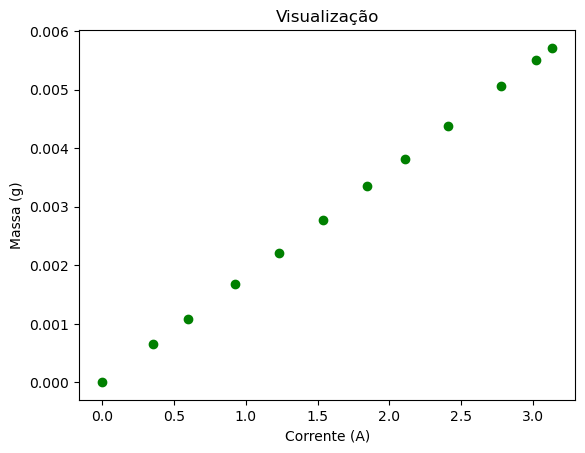

pandas.core.frame.DataFrame

In [220]:
# visualizando os dados pelo gráfico

plt.figure() 
plt.errorbar(x, y, incy, incx,'og')
plt.title("Visualização")
plt.xlabel("Corrente (A)")
plt.ylabel("Massa (g)")
plt.show()

type(x.to_frame())

Podemos observar que a relação não é linear. Para se fazer um ajuste pelo método dos mínimos quadrados (MMQ) devemos conhecer - ou ao menos modelar - a dependência de y em relação a x (por exemplo, campo elétrico em função da distância). De posse dessa forma funcional é possível aplicar uma linearização aos dados e então sobre o resultado da linearização é possível se fazer um ajuste linear usando MMQ.

## Linearização dos dados

No caso do experimento para lei de Ohm o gráfico de $V$ em função de $I$ é linear, então não precisamos fazer uma linearização

In [221]:
#linearizando a sequência de valores de x usando numpy
z = x
z

0     0.000
1     0.353
2     0.600
3     0.925
4     1.231
5     1.536
6     1.847
7     2.107
8     2.409
9     2.780
10    3.023
11    3.134
Name: Corrente, dtype: float64

### Propagação das incertezas na linearização

Como nosso caso é linear, não precisamos nos preocupar com a propagação de incertezas.

In [222]:
#propagando a incerteza por conta da linearização
sigma_z = incx
sigma_z

array([0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004,
       0.004, 0.004, 0.004])

## MMQ com $ \chi^2 $

Em um ajuste por regressão linear no modo mais simples não se utilizam incertezas associadas aos pontos e também não se obtém as incertezas nos parâmetros ajustados (ou matriz covariância). Além disso utiliza-se como medida da qualidade de ajuste a variável $ R^2 $, que na verdade é uma estimativa de quanto dos dados pode ser descrito pelo modelo/função ajustado(a). Ela é também o quadrado da correlação de Pearson. Em geral se diz que quanto mais próximo de 1 é  $ R^2 $ melhor é o ajuste, mas se for realizado o cálculo de $ R^2 $ para um ajuste a uma grandeza constante o valor será muito próximo de zero, mesmo que se tenha um ajuste bastante verossímil.
Para se obter um ajuste de MMQ que tenha significado probabilístico - ou seja tenha um resultado de $ \chi^2 $ associado - é preciso que se informe ao método de ajuste as incertezas dos pontos experimentais. No caso do ajuste por MMQ somente as incertezas na variável dependente (y) é que são aceitas, portanto se as incertezas em x não são desprezíveis é preciso propagá-las para y. Para uma explicação detalhada do procedimento, verifique a **referência 1**. 

Para essa propagação completa é preciso fazer:
$$ (\sigma_y)^2= (\sigma_{y_0})^2 + \left(\frac{dy}{dx}\sigma_x \right)^2$$
onde $\sigma_{y_0}$ corresponde à incerteza original de y (aquela que vem da própria medida) e $\frac{dy}{dx}$ pode ser aproximado pelo coeficiente angular de um ajuste linear aos dados. Neste exemplo, $\sigma_x$ é a variável sigma_z.
Para o coeficiente angular podemos realizar uma regressão linear simples (RLS) aos dados e usar com excelente precisão o valor do parâmetro correspondente obtido da RLS, sem se preocupar neste momento com a qualidade do ajuste.


In [223]:
#ajustando a reta (RLS)
xlin = sm.add_constant(z)
reglin = sm.OLS(y,xlin)
reglin_dat = reglin.fit()
f_de_z = reglin_dat.params

Para esse ajuste o coeficiente angular é o primeiro parâmetro do vetor f_de_z com o valor:

In [224]:
print("coeficiente angular: ", f_de_z.iloc[1])

coeficiente angular:  0.0018224793273753448


Com o coeficiente angular ($dy/dx$) pode-se então fazer a transferência de incertezas para o y:

In [225]:
#transferindo incerteza de z para y
incytransf = np.sqrt(np.power(f_de_z.iloc[1]*sigma_z,2)+np.power(incy,2)) 
incytransf

array([1.23750917e-05, 1.23750917e-05, 1.23750917e-05, 1.23750917e-05,
       1.23750917e-05, 1.23750917e-05, 1.23750917e-05, 1.23750917e-05,
       1.23750917e-05, 1.23750917e-05, 1.23750917e-05, 1.23750917e-05])

É interessante visualizar novamente os pontos agora apenas com incertezas em y

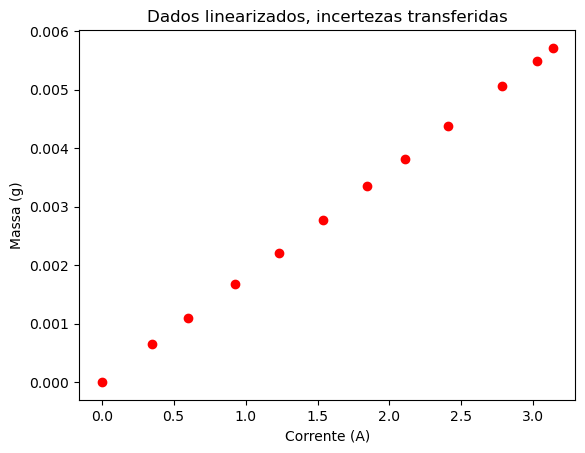

In [226]:
#plotando gráfico com as incertezas transferidas para a variável dependente (y)
plt.errorbar(z, y, incytransf,0,'or')
plt.title("Dados linearizados, incertezas transferidas")
plt.xlabel("Corrente (A)")
plt.ylabel("Massa (g)")
plt.show()


Para se obter as incertezas do ajuste é necessário obter o inverso da **matriz de covariância** do ajuste e a partir dela, os termos da sua diagonal principal. Esses termos correspondem às variâncias dos parâmetros de forma que (veja o capítulo 12 da **referência 2**):
$$\sigma_{p_j}^2=a_{jj}$$
onde os termos $a_{jj}$ correspondem a
$$ \mathcal{M}^{-1} = \begin{pmatrix} a_{00} & a_{01} \\ a_{10} & a_{11} \end{pmatrix}$$
No _WLS_ do **statsmodels** a função HC0 ('_HCzero_') retorna diretamente as incertezas do ajuste.

In [227]:
#criando os 'pesos' a partir da incerteza
ws = 1/(incytransf**2)
reglinw = sm.WLS(y,xlin,ws)
result_rlw = reglinw.fit()
fitpars = result_rlw.params
fiterrs = result_rlw.HC0_se
print(fitpars.iloc[0],fitpars.iloc[1])
print(fiterrs.iloc[0],fiterrs.iloc[1])

-8.27918204176993e-06 0.0018224793273753444
6.410251933344119e-06 3.1500240522751196e-06


**ATENÇÃO:** note que os parâmetros do ajuste **mudaram** quando as incertezas foram utilizadas como _pesos_ no ajuste.

In [228]:
#note que o statsmodels retorna os parâmetros em ordem inversa em relação aos outros dois métodos
p_0 = fitpars.iloc[1] #coef ang
p_1 = fitpars.iloc[0] #coef lin
#note que não há raiz quadrada
s_p_0 = fiterrs.iloc[1] #incert p_0
s_p_1 = fiterrs.iloc[0] #incert p_1
rp_0 = np.round(p_0,2)
rp_1 = np.round(p_1,2)
rs_p_0 = np.round(s_p_0,2)
rs_p_1 = np.round(s_p_1,2)
print("coef. angular=",rp_0,"+-",rs_p_0)
print("coef. linear=",rp_1,"+-",rs_p_1)

coef. angular= 0.0 +- 0.0
coef. linear= -0.0 +- 0.0


## Graficando o ajuste aos pontos
Agora colocamos a linha reta referente aos pontos da seguinte forma:

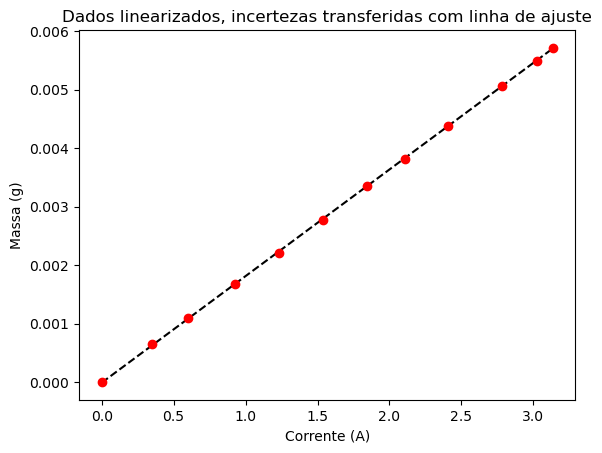

In [229]:
xline = z
yline = fitpars.iloc[0] + fitpars.iloc[1] * z
plt.errorbar(z, y, incytransf,0,'or')
plt.title("Dados linearizados, incertezas transferidas com linha de ajuste")
plt.xlabel("Corrente (A)")
plt.ylabel("Massa (g)")
#incluindo a linha do ajuste linear, k=preto, '--' = linha tracejada
plt.plot(xline, yline, 'k--')

## Qualidade do ajuste
Existem várias grandezas utilizadas como medida de qualidade do ajuste: $\chi^2_{red}$ (qui-quadrado reduzido), $R^2$ e gráfico de resíduos.



 ### 1. Teste de $\chi^2$ ou $\chi^2_{red}$
 O teste de $\chi^2$ baseia-se na expectativa de que o $\chi^2_{red}$ seja muito próximo do valor 1 (um). Para uma explicação deste teste veja o capítulo 14 da **referência 2**.
 Alguns cuidados devem ser tomados na interpretação de $\chi^2_{red}$. Em geral se os valores se afastam muito de 1 (ou $\chi^2_{red}$>>1 ou $\chi^2_{red}\approx 0$ há problemas. O primeiro dos problemas é com o a estimação da incerteza dos dados experimentais. Quando a subestimação das incertezas o valor de $\chi^2_{red}$ fica artificialmente maior que 1 e o contrário também é verdade, incertezas superestimadas levam a um reduzido valor de $\chi^2_{red}$. O último caso é sempre o sintoma de superestimação de incertezas. No entanto, quando $\chi^2_{red}$>>1 nem sempre o problema é de subestimação de incertezas, mas pode ser que a função ajustada (ou modelo) não é adequado para descrever os dados experimentais (por exemplo, usar uma reta em dados que seriam melhor descritos por um polinômio do segundo grau). Não existe uma única forma para se calcular o $\chi^2_{red}$ com o **statsmodel**, mas podemos usar o **numpy** com os resultados do _WLS_ :

In [230]:
#calulando chi^2_red
invpars = fitpars.iloc[1],fitpars.iloc[0]
yhat = np.polyval(invpars, z)
chi_squared = np.sum(((yhat - y)/incytransf) ** 2)
print(chi_squared)
chi2_red = chi_squared/(len(z)-2)
chi2_red

11.079028332319997


np.float64(1.1079028332319996)

### 2. Valor de $R^2$
 O $R^2$ é simplesmente o quadrado do coeficiente de correlação. O coeficiente de correlação, geralmente denotado por $\rho$ (também conhecido como [coeficiente de correlação de Pearson](https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson)). Como o valor de $\rho$ é limitado
 $$-1<\rho<1$$
 o valor de $R^2$ quadrado também será limitado ($0<R^2<1$), interpretando-se a qualidade do ajuste como sendo tão melhor quanto mais próxima de 1. No entanto, esse é um equívoco, pois assim como $\rho$, $R^2$ dá uma medida da intensidade da correlação entre os valores $x$ e $y$ dos pontos experimentais. Se o ajuste de reta proposto tiver um coeficiente angular com valor muito baixo comparado ao do coeficiente linear combinado com flutuações dos pontos moderadas (pouco mais de 1%) o valor de $R^2$ pode facilmente cair abaixo de 0.5, o que levaria à uma conclusão possivelmente errônea de má qualidade de ajuste (ou de modelo). Por outro lado, um conjunto de pontos levemente não linear (tipo $x^{3/2}$) pode ser ajustado por uma reta com $R^2$>0.9, indicando erroneamente que o ajuste é bom.
**Portanto deve-se evitar $R^2$ como única medida de qualidade de ajuste.**

O **statsmodels** tem uma forma bem simples de se obter o $R^2$ a partir dos resultados do ajuste via _WLS_ :


In [231]:
np.round(result_rlw.rsquared,3)

np.float64(1.0)

### 3. Gráfico de resíduos

O gráfico de resíduos é sempre uma boa ferramenta e deve sempre que possível ser usada complementarmente a outras medidas de qualidade, principalmente quando se usa $R^2$, que jamais deve ser usado sozinho. 
Para se fazer um gráfico de ajuste faz-se um gráfico com o mesmo eixo $x$ dos dados originais, enquanto que no eixo vertical devem ser colocados os valores da diferença $(\hat{y}-y)$, onde $\hat{y}$ são os valores calculados para cada $x$ a partir dos parâmetros do ajuste.

Um bom ajuste deverá mostrar um gráfico de resíduos com os pontos distribuídos de maneira aleatória acima e abaixo do eixo $x$. Na célula abaixo é apresentada a confecção de um gráfico de resíduos. Os dados usados neste exemplo _parecem_ razoáveis.

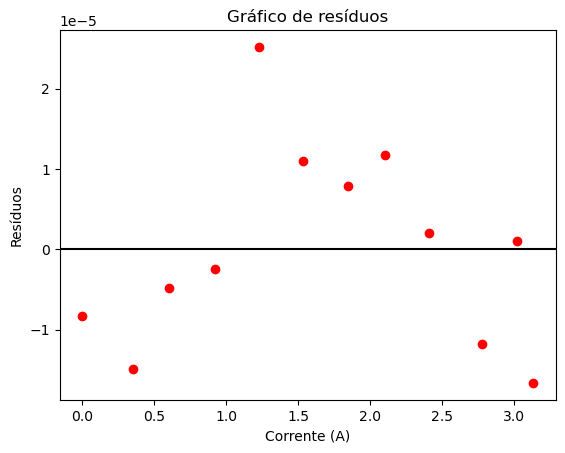

In [232]:
resid = (yhat - y)
plt.plot(z, resid, 'or')
plt.title("Gráfico de resíduos")
plt.xlabel("Corrente (A)")
plt.ylabel("Resíduos")
plt.axhline(y=0, color='k', linestyle='-')

## Valor estimado de Comprimento do Fio

A teoria nos dá que 

$$ F_B = I\vec{L} \times \vec{B}$$
$$ F_B = P = mg \rightarrow m = \frac{P}{g}$$
$$ y = m \text{ , } x = I$$
$$ y = x \frac{LB}{g}$$
$$ \frac{LB}{g} = a$$
$$ L = \frac{g}{B}a$$

In [233]:
a = p_0
s_a = s_p_0

B = -0.397 
s_B = 0

g = 9.81

L = g*a/B
s_L = np.sqrt(((g/B)*s_a)**2 + ((-(a*g/B**2))*s_B)**2)
print("L=",L,"+-",s_L)

L= -0.04503406096108849 +- 7.783812582574035e-05


# Metodo 2

In [234]:
# vc precisa de um arquivo .csv para cada conjunto de dados
dados = pd.read_csv("metodo2.csv")
print(dados)

x = dados["Campo"] * 1e-3  # Convert to T
y = dados["massa"] * 1e-3  # Convert to kg
incx = dados["sCampo"] * 1e-3  # Convert to T
incy = np.full_like(y, 0.01 * 1e-3, dtype=float) # Convert to kg


# Format and print x with uncertainties
for xi, incxi in zip(x, incx):
    print(f"{xi} +- {incxi}")


print("")
# Format and print y with uncertainties
for yi, incyi in zip(y, incy):
    print(f"{yi} +- {incyi}")

    Campo  massa  sCampo
0    -397   5.74     6.2
1    -360   5.23     6.1
2    -320   4.69     5.9
3    -280   4.16     5.8
4    -240   3.63     5.7
5    -200   3.11     5.6
6    -160   2.54     5.5
7    -120   1.99     5.4
8     -80   1.42     5.2
9     -40   0.87     5.1
10     -2   0.30     5.0
-0.397 +- 0.006200000000000001
-0.36 +- 0.0060999999999999995
-0.32 +- 0.005900000000000001
-0.28 +- 0.0058
-0.24 +- 0.0057
-0.2 +- 0.0056
-0.16 +- 0.0055
-0.12 +- 0.0054
-0.08 +- 0.005200000000000001
-0.04 +- 0.0050999999999999995
-0.002 +- 0.005

0.00574 +- 1e-05
0.00523 +- 1e-05
0.004690000000000001 +- 1e-05
0.0041600000000000005 +- 1e-05
0.00363 +- 1e-05
0.00311 +- 1e-05
0.00254 +- 1e-05
0.00199 +- 1e-05
0.00142 +- 1e-05
0.00087 +- 1e-05
0.0003 +- 1e-05


Podemos inicialmente colocar os dados num gráfico para fazer uma primeira visualização exploratória. Para isso usamos o _pyplot_ do _matplotlib_ para graficar os pontos com suas respectivas barras de erro.

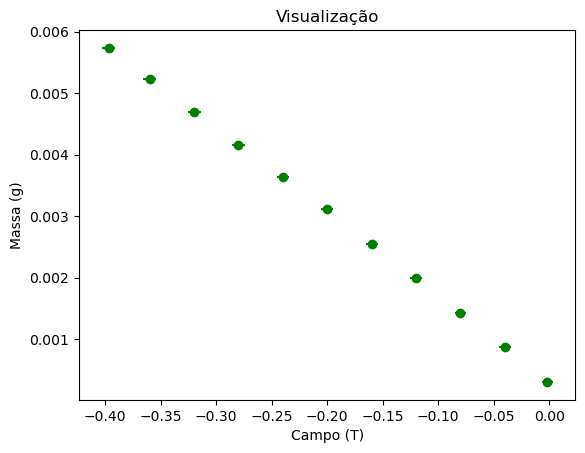

pandas.core.frame.DataFrame

In [235]:
# visualizando os dados pelo gráfico

plt.figure() 
plt.errorbar(x, y, incy, incx,'og')
plt.title("Visualização")
plt.xlabel("Campo (T)")
plt.ylabel("Massa (g)")
plt.show()

type(x.to_frame())

Podemos observar que a relação não é linear. Para se fazer um ajuste pelo método dos mínimos quadrados (MMQ) devemos conhecer - ou ao menos modelar - a dependência de y em relação a x (por exemplo, campo elétrico em função da distância). De posse dessa forma funcional é possível aplicar uma linearização aos dados e então sobre o resultado da linearização é possível se fazer um ajuste linear usando MMQ.

## Linearização dos dados

No caso do experimento para lei de Ohm o gráfico de $V$ em função de $I$ é linear, então não precisamos fazer uma linearização

In [236]:
#linearizando a sequência de valores de x usando numpy
z = x
z

0    -0.397
1    -0.360
2    -0.320
3    -0.280
4    -0.240
5    -0.200
6    -0.160
7    -0.120
8    -0.080
9    -0.040
10   -0.002
Name: Campo, dtype: float64

### Propagação das incertezas na linearização

Como nosso caso é linear, não precisamos nos preocupar com a propagação de incertezas.

In [237]:
#propagando a incerteza por conta da linearização
sigma_z = incx
sigma_z

0     0.0062
1     0.0061
2     0.0059
3     0.0058
4     0.0057
5     0.0056
6     0.0055
7     0.0054
8     0.0052
9     0.0051
10    0.0050
Name: sCampo, dtype: float64

## Visualizando a linearização

Em seguida podemos fazer a visualização dos dados após a linearização refazendo o gráfico com a variável z no lugar de x:

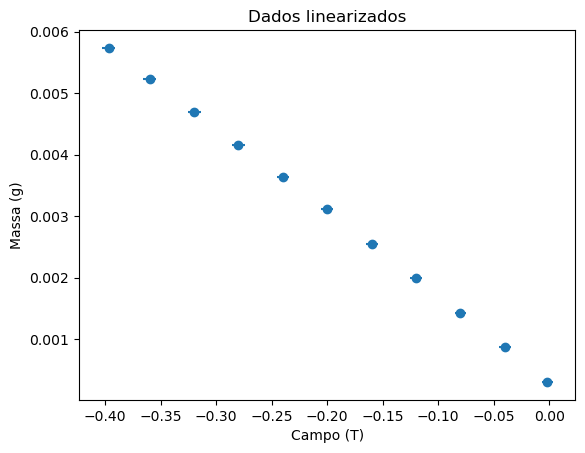

In [238]:
# visualizando os dados linearizados
plt.errorbar(z, y, incy,sigma_z,'o')
plt.title("Dados linearizados")
plt.xlabel("Campo (T)")
plt.ylabel("Massa (g)")
plt.show()

## MMQ com $ \chi^2 $

Em um ajuste por regressão linear no modo mais simples não se utilizam incertezas associadas aos pontos e também não se obtém as incertezas nos parâmetros ajustados (ou matriz covariância). Além disso utiliza-se como medida da qualidade de ajuste a variável $ R^2 $, que na verdade é uma estimativa de quanto dos dados pode ser descrito pelo modelo/função ajustado(a). Ela é também o quadrado da correlação de Pearson. Em geral se diz que quanto mais próximo de 1 é  $ R^2 $ melhor é o ajuste, mas se for realizado o cálculo de $ R^2 $ para um ajuste a uma grandeza constante o valor será muito próximo de zero, mesmo que se tenha um ajuste bastante verossímil.
Para se obter um ajuste de MMQ que tenha significado probabilístico - ou seja tenha um resultado de $ \chi^2 $ associado - é preciso que se informe ao método de ajuste as incertezas dos pontos experimentais. No caso do ajuste por MMQ somente as incertezas na variável dependente (y) é que são aceitas, portanto se as incertezas em x não são desprezíveis é preciso propagá-las para y. Para uma explicação detalhada do procedimento, verifique a **referência 1**. 

Para essa propagação completa é preciso fazer:
$$ (\sigma_y)^2= (\sigma_{y_0})^2 + \left(\frac{dy}{dx}\sigma_x \right)^2$$
onde $\sigma_{y_0}$ corresponde à incerteza original de y (aquela que vem da própria medida) e $\frac{dy}{dx}$ pode ser aproximado pelo coeficiente angular de um ajuste linear aos dados. Neste exemplo, $\sigma_x$ é a variável sigma_z.
Para o coeficiente angular podemos realizar uma regressão linear simples (RLS) aos dados e usar com excelente precisão o valor do parâmetro correspondente obtido da RLS, sem se preocupar neste momento com a qualidade do ajuste.


In [239]:
#ajustando a reta (RLS)
xlin = sm.add_constant(z)
reglin = sm.OLS(y,xlin)
reglin_dat = reglin.fit()
f_de_z = reglin_dat.params

Para esse ajuste o coeficiente angular é o primeiro parâmetro do vetor f_de_z com o valor:

In [240]:
print("coeficiente angular: ", f_de_z.iloc[1])

coeficiente angular:  -0.013686581246323423


Com o coeficiente angular ($dy/dx$) pode-se então fazer a transferência de incertezas para o y:

In [241]:
#transferindo incerteza de z para y
incytransf = np.sqrt(np.power(f_de_z.iloc[1]*sigma_z,2)+np.power(incy,2)) 
incytransf

0     0.000085
1     0.000084
2     0.000081
3     0.000080
4     0.000079
5     0.000077
6     0.000076
7     0.000075
8     0.000072
9     0.000071
10    0.000069
Name: sCampo, dtype: float64

É interessante visualizar novamente os pontos agora apenas com incertezas em y

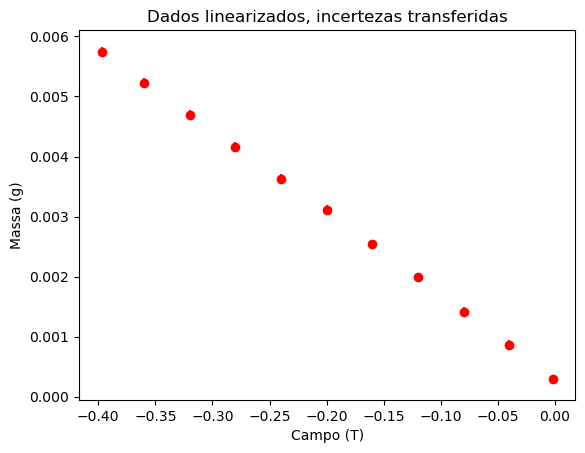

In [242]:
#plotando gráfico com as incertezas transferidas para a variável dependente (y)
plt.errorbar(z, y, incytransf,0,'or')
plt.title("Dados linearizados, incertezas transferidas")
plt.xlabel("Campo (T)")
plt.ylabel("Massa (g)")
plt.show()


Para se obter as incertezas do ajuste é necessário obter o inverso da **matriz de covariância** do ajuste e a partir dela, os termos da sua diagonal principal. Esses termos correspondem às variâncias dos parâmetros de forma que (veja o capítulo 12 da **referência 2**):
$$\sigma_{p_j}^2=a_{jj}$$
onde os termos $a_{jj}$ correspondem a
$$ \mathcal{M}^{-1} = \begin{pmatrix} a_{00} & a_{01} \\ a_{10} & a_{11} \end{pmatrix}$$
No _WLS_ do **statsmodels** a função HC0 ('_HCzero_') retorna diretamente as incertezas do ajuste.

In [243]:
#criando os 'pesos' a partir da incerteza
ws = 1/(incytransf**2)
reglinw = sm.WLS(y,xlin,ws)
result_rlw = reglinw.fit()
fitpars = result_rlw.params
fiterrs = result_rlw.HC0_se
print(fitpars.iloc[0],fitpars.iloc[1])
print(fiterrs.iloc[0],fiterrs.iloc[1])

0.00032133403118468135 -0.013708850421926882
1.8321981668191952e-05 7.29892939212093e-05


**ATENÇÃO:** note que os parâmetros do ajuste **mudaram** quando as incertezas foram utilizadas como _pesos_ no ajuste.

In [244]:
#note que o statsmodels retorna os parâmetros em ordem inversa em relação aos outros dois métodos
p_0 = fitpars.iloc[1] #coef ang
p_1 = fitpars.iloc[0] #coef lin
#note que não há raiz quadrada
s_p_0 = fiterrs.iloc[1] #incert p_0
s_p_1 = fiterrs.iloc[0] #incert p_1
rp_0 = np.round(p_0,2)
rp_1 = np.round(p_1,2)
rs_p_0 = np.round(s_p_0,2)
rs_p_1 = np.round(s_p_1,2)
print("coef. angular=",rp_0,"+-",rs_p_0)
print("coef. linear=",rp_1,"+-",rs_p_1)

coef. angular= -0.01 +- 0.0
coef. linear= 0.0 +- 0.0


## Graficando o ajuste aos pontos
Agora colocamos a linha reta referente aos pontos da seguinte forma:

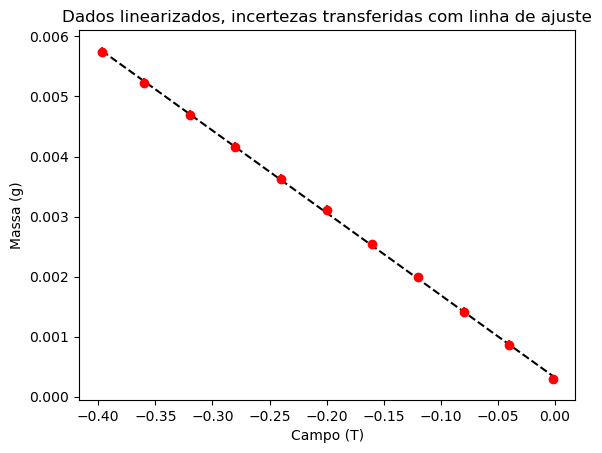

In [245]:
xline = z
yline = fitpars.iloc[0] + fitpars.iloc[1] * z
plt.errorbar(z, y, incytransf,0,'or')
plt.title("Dados linearizados, incertezas transferidas com linha de ajuste")
plt.xlabel("Campo (T)")
plt.ylabel("Massa (g)")
#incluindo a linha do ajuste linear, k=preto, '--' = linha tracejada
plt.plot(xline, yline, 'k--')

## Qualidade do ajuste
Existem várias grandezas utilizadas como medida de qualidade do ajuste: $\chi^2_{red}$ (qui-quadrado reduzido), $R^2$ e gráfico de resíduos.



 ### 1. Teste de $\chi^2$ ou $\chi^2_{red}$
 O teste de $\chi^2$ baseia-se na expectativa de que o $\chi^2_{red}$ seja muito próximo do valor 1 (um). Para uma explicação deste teste veja o capítulo 14 da **referência 2**.
 Alguns cuidados devem ser tomados na interpretação de $\chi^2_{red}$. Em geral se os valores se afastam muito de 1 (ou $\chi^2_{red}$>>1 ou $\chi^2_{red}\approx 0$ há problemas. O primeiro dos problemas é com o a estimação da incerteza dos dados experimentais. Quando a subestimação das incertezas o valor de $\chi^2_{red}$ fica artificialmente maior que 1 e o contrário também é verdade, incertezas superestimadas levam a um reduzido valor de $\chi^2_{red}$. O último caso é sempre o sintoma de superestimação de incertezas. No entanto, quando $\chi^2_{red}$>>1 nem sempre o problema é de subestimação de incertezas, mas pode ser que a função ajustada (ou modelo) não é adequado para descrever os dados experimentais (por exemplo, usar uma reta em dados que seriam melhor descritos por um polinômio do segundo grau). Não existe uma única forma para se calcular o $\chi^2_{red}$ com o **statsmodel**, mas podemos usar o **numpy** com os resultados do _WLS_ :

In [246]:
#calulando chi^2_red
invpars = fitpars.iloc[1],fitpars.iloc[0]
yhat = np.polyval(invpars, z)
chi_squared = np.sum(((yhat - y)/incytransf) ** 2)
print(chi_squared)
chi2_red = chi_squared/(len(z)-2)
chi2_red

1.3586486045463764


np.float64(0.15096095606070847)

### 2. Valor de $R^2$
 O $R^2$ é simplesmente o quadrado do coeficiente de correlação. O coeficiente de correlação, geralmente denotado por $\rho$ (também conhecido como [coeficiente de correlação de Pearson](https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson)). Como o valor de $\rho$ é limitado
 $$-1<\rho<1$$
 o valor de $R^2$ quadrado também será limitado ($0<R^2<1$), interpretando-se a qualidade do ajuste como sendo tão melhor quanto mais próxima de 1. No entanto, esse é um equívoco, pois assim como $\rho$, $R^2$ dá uma medida da intensidade da correlação entre os valores $x$ e $y$ dos pontos experimentais. Se o ajuste de reta proposto tiver um coeficiente angular com valor muito baixo comparado ao do coeficiente linear combinado com flutuações dos pontos moderadas (pouco mais de 1%) o valor de $R^2$ pode facilmente cair abaixo de 0.5, o que levaria à uma conclusão possivelmente errônea de má qualidade de ajuste (ou de modelo). Por outro lado, um conjunto de pontos levemente não linear (tipo $x^{3/2}$) pode ser ajustado por uma reta com $R^2$>0.9, indicando erroneamente que o ajuste é bom.
**Portanto deve-se evitar $R^2$ como única medida de qualidade de ajuste.**

O **statsmodels** tem uma forma bem simples de se obter o $R^2$ a partir dos resultados do ajuste via _WLS_ :


In [247]:
np.round(result_rlw.rsquared,3)

np.float64(1.0)

### 3. Gráfico de resíduos

O gráfico de resíduos é sempre uma boa ferramenta e deve sempre que possível ser usada complementarmente a outras medidas de qualidade, principalmente quando se usa $R^2$, que jamais deve ser usado sozinho. 
Para se fazer um gráfico de ajuste faz-se um gráfico com o mesmo eixo $x$ dos dados originais, enquanto que no eixo vertical devem ser colocados os valores da diferença $(\hat{y}-y)$, onde $\hat{y}$ são os valores calculados para cada $x$ a partir dos parâmetros do ajuste.

Um bom ajuste deverá mostrar um gráfico de resíduos com os pontos distribuídos de maneira aleatória acima e abaixo do eixo $x$. Na célula abaixo é apresentada a confecção de um gráfico de resíduos. Os dados usados neste exemplo _parecem_ razoáveis.

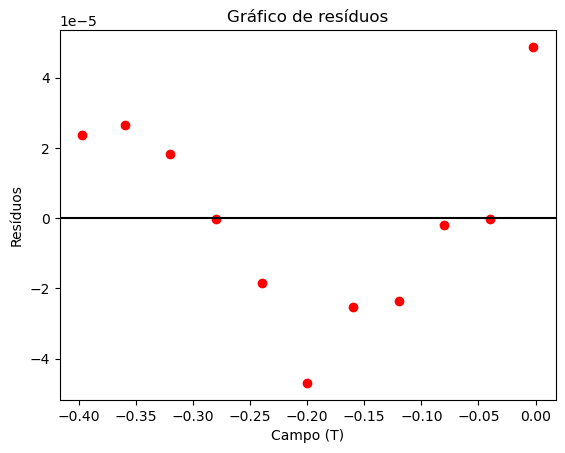

In [248]:
resid = (yhat - y)
plt.plot(z, resid, 'or')
plt.title("Gráfico de resíduos")
plt.xlabel("Campo (T)")
plt.ylabel("Resíduos")
plt.axhline(y=0, color='k', linestyle='-')

## Valor estimado de Comprimento do Fio

A teoria nos dá que 

$$ F_B = I\vec{L} \times \vec{B}$$
$$ F_B = P = mg \rightarrow m = \frac{P}{g}$$
$$ y = m \text{ , } x = B$$
$$ y = x \frac{LI}{g}$$
$$ \frac{LI}{g} = a$$
$$ L = \frac{g}{I}a$$

In [249]:
a = p_0
s_a = s_p_0

I = 3.133
s_I = 0

g = 9.81

L = g*a/I
s_L = np.sqrt(((g/I)*s_a)**2 + ((-(a*g/I**2))*s_I)**2)
print("L=",L,"+-",s_L)

L= -0.04292493540986362 +- 0.0002285429215981689


## Referências

1. Principios de Física - Volume 2,  Raymond A. Serway, John W. Jewett, Jr., Tradução da 5$^a$ Edição Norte-Americana, 2015 (ISBN-10:85-221-1637-7)
2. Fundamentos da Teoria dos Erros, José Henrique Vuolo, 2$^a$ edição, Editora Edgar Blücher, 1996 (ISBN: 85-212-0056-0)